In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from glob import glob
import os
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [89]:
df1=pd.read_csv("load_wine.csv")

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    180 non-null    float64
 1   alcohol                       181 non-null    float64
 2   malic_acid                    180 non-null    float64
 3   ash                           180 non-null    float64
 4   alcalinity_of_ash             180 non-null    float64
 5   magnesium                     180 non-null    float64
 6   total_phenols                 180 non-null    float64
 7   flavanoids                    181 non-null    float64
 8   nonflavanoid_phenols          181 non-null    float64
 9   proanthocyanins               181 non-null    float64
 10  color_intensity               179 non-null    float64
 11  hue                           181 non-null    float64
 12  od280/od315_of_diluted_wines  180 non-null    float64
 13  proli

In [91]:
df1.isnull().sum()

Unnamed: 0                      1
alcohol                         0
malic_acid                      1
ash                             1
alcalinity_of_ash               1
magnesium                       1
total_phenols                   1
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 2
hue                             0
od280/od315_of_diluted_wines    1
proline                         1
label                           0
dtype: int64

In [92]:
df1.corr()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
Unnamed: 0,1.000000,-0.365923,0.493385,-0.009345,0.561579,-0.233556,-0.640156,-0.751369,0.486409,-0.395895,0.228535,-0.651498,-0.690664,-0.648020,0.937246
alcohol,-0.365923,1.000000,0.101750,0.201785,-0.295632,0.266473,0.258952,0.210490,-0.146198,0.114460,0.563152,-0.076002,0.050176,0.639094,-0.316125
malic_acid,0.493385,0.101750,1.000000,0.155567,0.286928,-0.069432,-0.332622,-0.413160,0.301669,-0.212406,0.249023,-0.546661,-0.374697,-0.198066,0.443098
ash,-0.009345,0.201785,0.155567,1.000000,0.445516,0.281563,0.129574,0.112728,0.182093,0.007943,0.265969,-0.081421,-0.001770,0.220603,-0.046593
alcalinity_of_ash,0.561579,-0.295632,0.286928,0.445516,1.000000,-0.087240,-0.325140,-0.355100,0.360533,-0.203291,0.025018,-0.275726,-0.278060,-0.435507,0.517948
magnesium,-0.233556,0.266473,-0.069432,0.281563,-0.087240,1.000000,0.209410,0.194703,-0.261808,0.228504,0.213963,0.048527,0.064095,0.399594,-0.213920
total_phenols,-0.640156,0.258952,-0.332622,0.129574,-0.325140,0.209410,1.000000,0.867001,-0.449008,0.613217,-0.048563,0.430892,0.701779,0.489134,-0.716575
flavanoids,-0.751369,0.210490,-0.413160,0.112728,-0.355100,0.194703,0.867001,1.000000,-0.537374,0.655757,-0.170869,0.544346,0.788899,0.486164,-0.844938
nonflavanoid_phenols,0.486409,-0.146198,0.301669,0.182093,0.360533,-0.261808,-0.449008,-0.537374,1.000000,-0.356202,0.130930,-0.253554,-0.503282,-0.316671,0.493333
proanthocyanins,-0.395895,0.114460,-0.212406,0.007943,-0.203291,0.228504,0.613217,0.655757,-0.356202,1.000000,-0.024358,0.312390,0.519892,0.313568,-0.494054


In [93]:
df1

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
177,177.0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
178,165.0,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2
179,120.0,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1


In [94]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df1['label']=LB.fit_transform(df1['label'])
df1

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
177,177.0,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
178,165.0,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2
179,120.0,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1


In [95]:
df1[df1.duplicated()]

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
178,165.0,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2
179,120.0,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1
180,99.0,12.29,3.17,2.21,18.0,88.0,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406.0,1


In [96]:
df1=df1.drop(df1[df1.duplicated()].index,axis=0)
df1=df1.drop(df1.columns[0],axis=1)
df1=df1.fillna(df1.median())
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [97]:
df1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.00000,178.000000,178.000000
mean,13.000618,2.337416,2.365112,19.510112,99.775281,2.298820,2.029270,0.361854,1.590899,5.025955,0.957449,2.61573,746.286517,0.938202
std,0.811827,1.116606,0.273730,3.333380,14.271185,0.624258,0.998859,0.124453,0.572359,2.289743,0.228572,0.70888,314.947367,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.27000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.757500,1.205000,0.270000,1.250000,3.220000,0.782500,1.93750,500.500000,0.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.360000,2.135000,0.340000,1.555000,4.640000,0.965000,2.78000,672.000000,1.000000
75%,13.677500,3.082500,2.547500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.182500,1.120000,3.17000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.00000,1680.000000,2.000000


In [98]:
df1.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.095650,0.205286,-0.304501,0.268729,0.288878,0.236815,-0.155929,0.136698,0.555968,-0.071747,0.070261,0.641110,-0.328222
malic_acid,0.095650,1.000000,0.164810,0.284653,-0.057125,-0.323481,-0.410916,0.292332,-0.220199,0.250674,-0.561220,-0.372289,-0.189972,0.436824
ash,0.205286,0.164810,1.000000,0.447366,0.276082,0.129586,0.112852,0.188798,0.012747,0.265948,-0.077150,-0.005326,0.215722,-0.043508
alcalinity_of_ash,-0.304501,0.284653,0.447366,1.000000,-0.085438,-0.319661,-0.350186,0.358848,-0.197860,0.020392,-0.270208,-0.274323,-0.431572,0.513280
magnesium,0.268729,-0.057125,0.276082,-0.085438,1.000000,0.209600,0.195964,-0.255960,0.238658,0.211394,0.054429,0.059576,0.386772,-0.209156
total_phenols,0.288878,-0.323481,0.129586,-0.319661,0.209600,1.000000,0.858521,-0.445893,0.606348,-0.031039,0.423879,0.688055,0.494835,-0.712815
flavanoids,0.236815,-0.410916,0.112852,-0.350186,0.195964,0.858521,1.000000,-0.537900,0.652692,-0.155925,0.543479,0.785157,0.491918,-0.847498
nonflavanoid_phenols,-0.155929,0.292332,0.188798,0.358848,-0.255960,-0.445893,-0.537900,1.000000,-0.365845,0.130219,-0.262640,-0.494000,-0.309449,0.489109
proanthocyanins,0.136698,-0.220199,0.012747,-0.197860,0.238658,0.606348,0.652692,-0.365845,1.000000,-0.004140,0.295544,0.520172,0.328652,-0.499130
color_intensity,0.555968,0.250674,0.265948,0.020392,0.211394,-0.031039,-0.155925,0.130219,-0.004140,1.000000,-0.506331,-0.423017,0.330529,0.252573


In [99]:
def outliers_detected(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_fence= Q1 - 1.5 * IQR
    upper_fence= Q3 + 1.5 * IQR
    out_liers=df.index[np.logical_or(df[column]<lower_fence,
                                      df[column]>upper_fence)]
    return out_liers
    
    
# outliers detected  now we need to remove them 
outliers=[outliers_detected(df1,df1.columns[i]) for i in range(len(df1.columns[:-1]))]

out=pd.Series(outliers,df1.columns[:-1] )
out

alcohol                                             Int64Index([], dtype='int64')
malic_acid                             Int64Index([123, 137, 173], dtype='int64')
ash                             Int64Index([25, 59, 66, 100, 121], dtype='int64')
alcalinity_of_ash                   Int64Index([59, 73, 121, 127], dtype='int64')
magnesium                             Int64Index([69, 73, 78, 95], dtype='int64')
total_phenols                                       Int64Index([], dtype='int64')
flavanoids                                          Int64Index([], dtype='int64')
nonflavanoid_phenols                                Int64Index([], dtype='int64')
proanthocyanins                              Int64Index([95, 110], dtype='int64')
color_intensity                   Int64Index([151, 158, 159, 166], dtype='int64')
hue                                              Int64Index([115], dtype='int64')
od280/od315_of_diluted_wines                        Int64Index([], dtype='int64')
proline         

In [100]:
df1.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [101]:
len(outliers)

13

In [102]:
    for i in range(len(outliers)+1):
        df1[df1.columns[i]]=df1[df1.columns[i]].drop(outliers_detected(df1,df1.columns[i]))
        print(df1[df1.columns[i]])
 

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64
0      1.71
1      1.78
2      2.36
3      1.95
4      2.59
       ... 
173     NaN
174    3.91
175    4.28
176    2.59
177    4.10
Name: malic_acid, Length: 178, dtype: float64
0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
173    2.45
174    2.48
175    2.26
176    2.37
177    2.74
Name: ash, Length: 178, dtype: float64
0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: alcalinity_of_ash, Length: 178, dtype: float64
0      127.0
1      100.0
2      101.0
3      113.0
4      118.0
       ...  
173     95.0
174    102.0
175    120.0
176    120.0
177     96.0
Name: magnesium, Length: 178, dtype: float64
0      2.80
1      2.65
2      2.80
3      3.85
4      2.80
       ... 
173    1.68
174    1

In [103]:
df1.isnull().sum()

alcohol                         0
malic_acid                      3
ash                             5
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [104]:
df1[df1.columns[1]]=df1[df1.columns[1]].drop(outliers_detected(df1,df1.columns[1])) 
df1[df1.columns[2]]=df1[df1.columns[2]].drop(outliers_detected(df1,df1.columns[2]))
df1[df1.columns[3]]=df1[df1.columns[3]].drop(outliers_detected(df1,df1.columns[3]))
df1[df1.columns[4]]=df1[df1.columns[4]].drop(outliers_detected(df1,df1.columns[4]))
df1[df1.columns[5]]=df1[df1.columns[5]].drop(outliers_detected(df1,df1.columns[8]))
df1[df1.columns[9]]=df1[df1.columns[9]].drop(outliers_detected(df1,df1.columns[9]))
df1[df1.columns[10]]=df1[df1.columns[10]].drop(outliers_detected(df1,df1.columns[10]))
df1.isnull().sum()


alcohol                         0
malic_acid                      4
ash                             6
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 6
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [105]:
df1=df1.fillna(df1.median())
df1.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

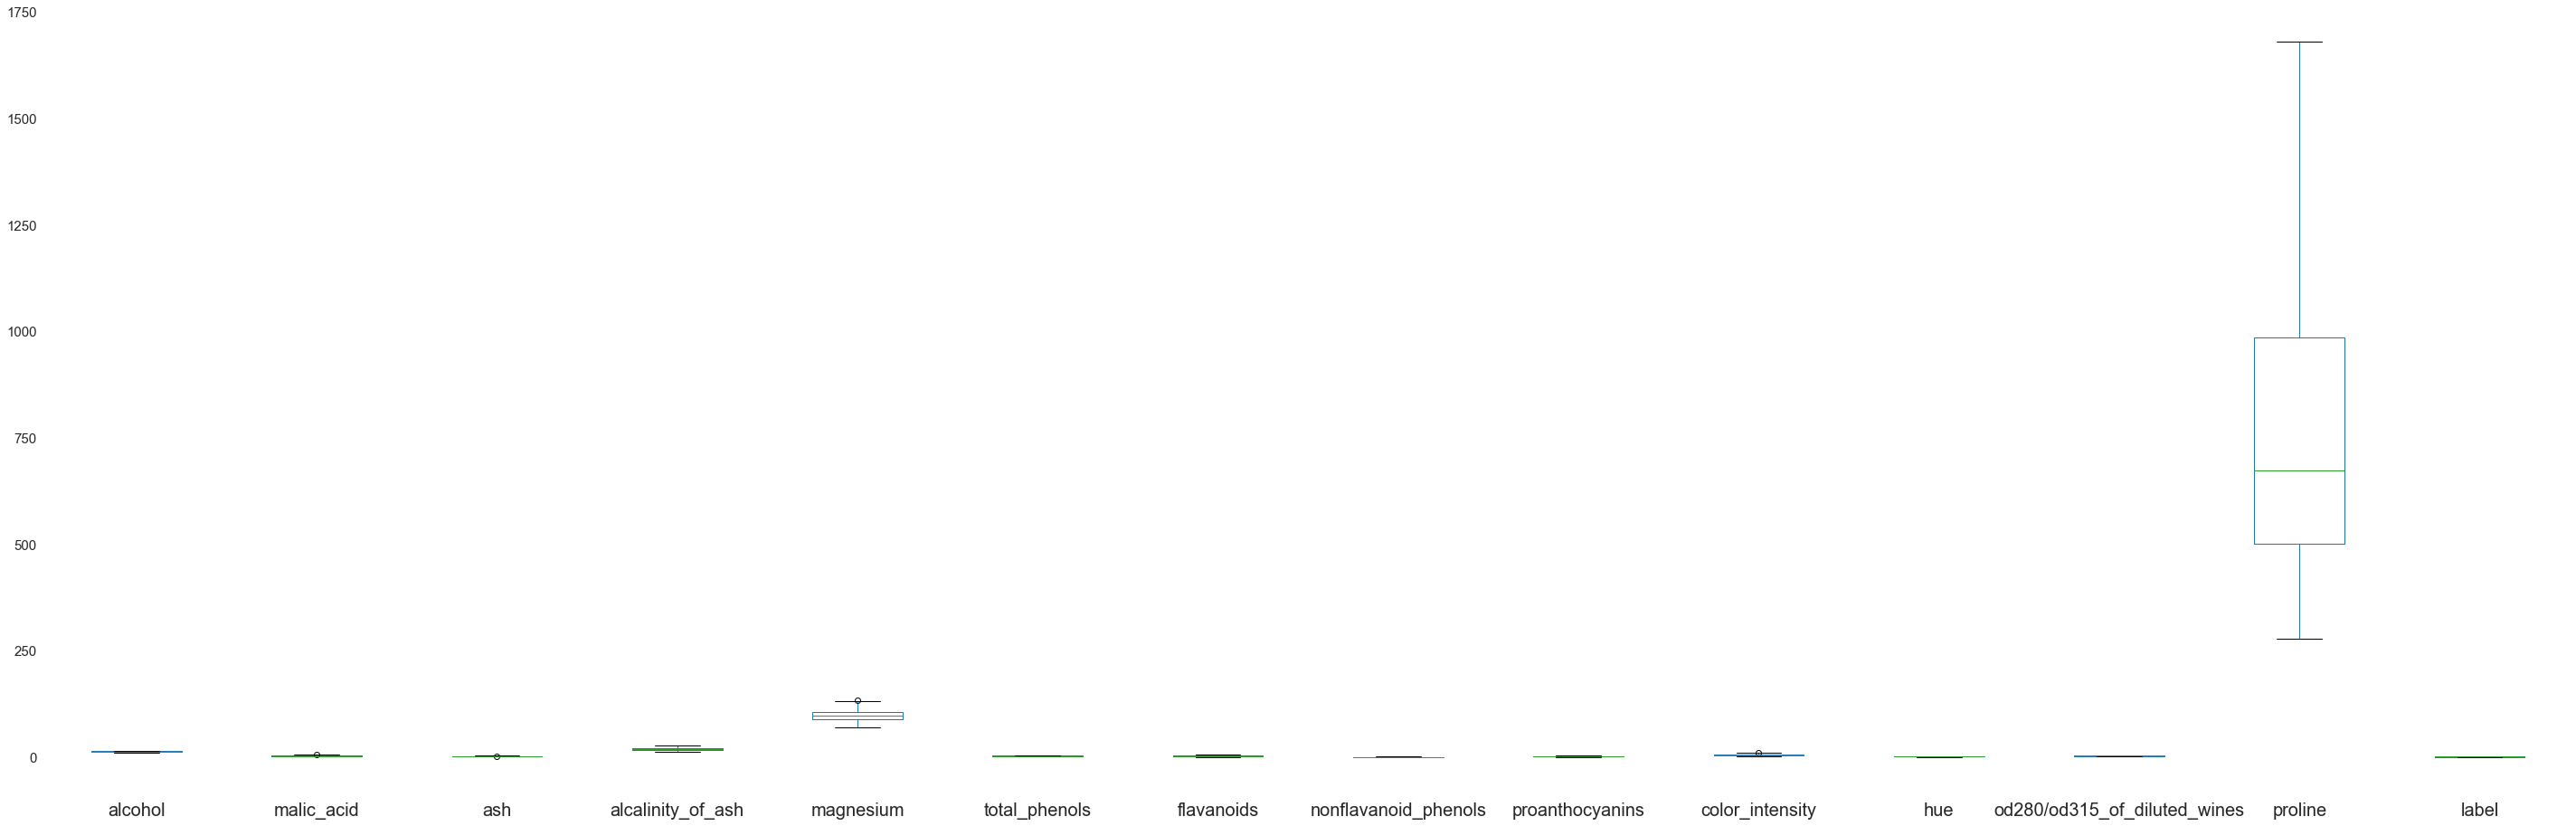

In [106]:
plt.figure(figsize=(50,16))
plt.xticks(size = 20)
plt.yticks(size = 15)

df1.boxplot(grid=False)
plt.show()

In [107]:
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.710,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.780,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.360,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.950,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.590,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.845,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.910,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.280,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.590,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [108]:
df1.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.094120,0.245110,-0.293863,0.371323,0.288878,0.236815,-0.155929,0.198148,0.587377,-0.027612,0.070261,0.641110,-0.328222
malic_acid,0.094120,1.000000,0.143071,0.269320,0.056644,-0.315581,-0.383623,0.226470,-0.254516,0.251812,-0.532123,-0.344891,-0.168153,0.399721
ash,0.245110,0.143071,1.000000,0.308942,0.333870,0.106789,0.040175,0.128841,0.014676,0.245638,-0.032305,-0.065682,0.219135,-0.021993
alcalinity_of_ash,-0.293863,0.269320,0.308942,1.000000,-0.153697,-0.412155,-0.482872,0.365051,-0.294829,-0.071352,-0.344455,-0.367416,-0.473304,0.563760
magnesium,0.371323,0.056644,0.333870,-0.153697,1.000000,0.233387,0.226635,-0.220206,0.097477,0.375814,-0.014031,0.037162,0.420862,-0.251166
total_phenols,0.288878,-0.315581,0.106789,-0.412155,0.233387,1.000000,0.858521,-0.445893,0.609824,0.009583,0.432625,0.688055,0.494835,-0.712815
flavanoids,0.236815,-0.383623,0.040175,-0.482872,0.226635,0.858521,1.000000,-0.537900,0.679081,-0.070804,0.558332,0.785157,0.491918,-0.847498
nonflavanoid_phenols,-0.155929,0.226470,0.128841,0.365051,-0.220206,-0.445893,-0.537900,1.000000,-0.362628,0.061706,-0.295438,-0.494000,-0.309449,0.489109
proanthocyanins,0.198148,-0.254516,0.014676,-0.294829,0.097477,0.609824,0.679081,-0.362628,1.000000,-0.015273,0.312670,0.547878,0.351567,-0.534855
color_intensity,0.587377,0.251812,0.245638,-0.071352,0.375814,0.009583,-0.070804,0.061706,-0.015273,1.000000,-0.406063,-0.343765,0.423332,0.138548


In [109]:
corelation=df1.corr()
corelation

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.094120,0.245110,-0.293863,0.371323,0.288878,0.236815,-0.155929,0.198148,0.587377,-0.027612,0.070261,0.641110,-0.328222
malic_acid,0.094120,1.000000,0.143071,0.269320,0.056644,-0.315581,-0.383623,0.226470,-0.254516,0.251812,-0.532123,-0.344891,-0.168153,0.399721
ash,0.245110,0.143071,1.000000,0.308942,0.333870,0.106789,0.040175,0.128841,0.014676,0.245638,-0.032305,-0.065682,0.219135,-0.021993
alcalinity_of_ash,-0.293863,0.269320,0.308942,1.000000,-0.153697,-0.412155,-0.482872,0.365051,-0.294829,-0.071352,-0.344455,-0.367416,-0.473304,0.563760
magnesium,0.371323,0.056644,0.333870,-0.153697,1.000000,0.233387,0.226635,-0.220206,0.097477,0.375814,-0.014031,0.037162,0.420862,-0.251166
total_phenols,0.288878,-0.315581,0.106789,-0.412155,0.233387,1.000000,0.858521,-0.445893,0.609824,0.009583,0.432625,0.688055,0.494835,-0.712815
flavanoids,0.236815,-0.383623,0.040175,-0.482872,0.226635,0.858521,1.000000,-0.537900,0.679081,-0.070804,0.558332,0.785157,0.491918,-0.847498
nonflavanoid_phenols,-0.155929,0.226470,0.128841,0.365051,-0.220206,-0.445893,-0.537900,1.000000,-0.362628,0.061706,-0.295438,-0.494000,-0.309449,0.489109
proanthocyanins,0.198148,-0.254516,0.014676,-0.294829,0.097477,0.609824,0.679081,-0.362628,1.000000,-0.015273,0.312670,0.547878,0.351567,-0.534855
color_intensity,0.587377,0.251812,0.245638,-0.071352,0.375814,0.009583,-0.070804,0.061706,-0.015273,1.000000,-0.406063,-0.343765,0.423332,0.138548


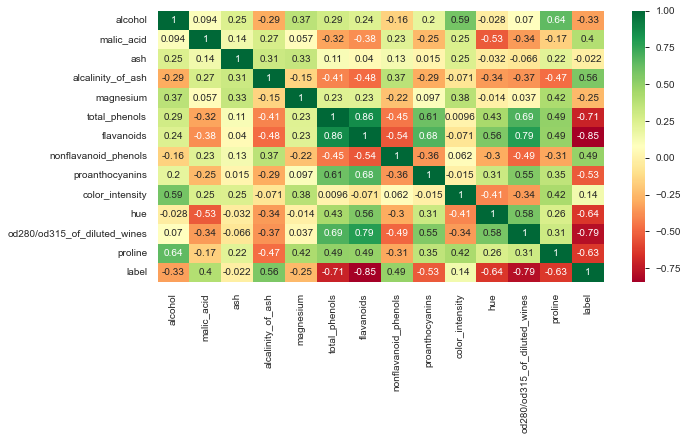

In [110]:
plt.figure(figsize=(10,5))
g=sns.heatmap(corelation,annot=True,cmap="RdYlGn")

In [111]:
#this VarienceThreshold will say if their are any dublicate features in data ,output is true means the feature
#is having variance if Flase their is no variance between features  we can remove the feature  
from sklearn.feature_selection import VarianceThreshold
variance=VarianceThreshold(threshold=0.2).fit(df1.iloc[:,:-1])
correlated_feat=pd.Series(variance.get_support(),df1.iloc[:,:-1].columns)
correlated_feat

alcohol                          True
malic_acid                       True
ash                             False
alcalinity_of_ash                True
magnesium                        True
total_phenols                    True
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                  True
color_intensity                  True
hue                             False
od280/od315_of_diluted_wines     True
proline                          True
dtype: bool

In [112]:
plt.figure(figsize=(10,5))
high_corr=df1[corelation[correlated_feat['label']]['label'].index].corr()
sns.heatmap(high_corr,annot=True,cmap="RdYlGn")

KeyError: 'label'

<Figure size 720x360 with 0 Axes>

In [113]:
correlated_feat.sum()

10

In [114]:
th = +0.7
correlated_feat = (abs(corelation) > th)
correlated_feat.sum()
a=dict(corelation[correlated_feat['label']]['label'])
list(a.keys())



['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines', 'label']

In [ ]:
dfc=df1[a.keys()]
dfc['label']=df1['label']
plt.figure(figsize=(10,5))
sns.heatmap(dfc.corr(),annot=True,cmap='RdYlGn')


In [ ]:
dfc

In [ ]:
from sklearn.feature_selection import VarianceThreshold
variance=VarianceThreshold(threshold=0.3).fit(x)
pd.Series(variance.get_support(),x.columns)
VarianceThreshold(threshold=0).fit_transform(x)


### feature selection using FILTER METHOD

In [ ]:
x=dfc.iloc[:,:-1]
y=dfc.iloc[:,-1]
xc=dfc.iloc[:,:-1].columns
x

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
KBest=SelectKBest(score_func=chi2,k=2)
Kimp=KBest.fit_transform(x,y)
print(KBest.scores_)
x.columns[KBest.get_support()]

### feature selection using WRAPPER METHOD  

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logi=LogisticRegression(solver='newton-cg')

In [ ]:
rfe=RFE(estimator=logi,n_features_to_select=2)

rfeimp=rfe.fit_transform(x,y)
print(x.columns[rfe.get_support()])
print(rfe.n_features_)
print(rfe.ranking_)

In [ ]:
### feature selection using WRAPPER METHOD  

In [ ]:
from sklearn.feature_selection import SelectFromModel 

In [ ]:
lr=LogisticRegression(solver='newton-cg').fit(x,y)

In [ ]:
model=SelectFromModel(lr,threshold='median',prefit=True,max_features = 2)

In [ ]:
print(model.get_support())
print(x.columns[model.get_support()])

### feature selection using extra_tree_Classifier & SelectFromModel

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
extra=ExtraTreesClassifier(n_estimators=50).fit(x,y)

In [ ]:
model2=SelectFromModel(extra,threshold="median",prefit=True,max_features = 3)


In [ ]:
# to get all values in data 
# dfc.iloc[:,:-1]
# to get column names use  dfc.iloc[:,:-1].columns
# to get the values 

In [ ]:
#the extraTreeClassifier will give the importance of the features as outout
# the higher th score the more importance the feature is 
allvalues=pd.Series(extra.feature_importances_)
# we can also do like this also
# allvalues=pd.Series(extra.feature_importances_,dfc.columns[:-1])
allvalues.index=x.columns
allvalues.sort_index(ascending=True)


In [ ]:
print(model2.get_support())
print(x.columns[model2.get_support()])

### feature selection using SelectFromModel

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
# we should using any algorithm here 
sfs_forward = SequentialFeatureSelector(estimator = extra,n_features_to_select=2,direction = 'forward').fit(x,y)

In [ ]:
print(sfs_forward.get_support())
print(x.columns[sfs_forward.get_support()])

In [ ]:
# spliting the data 
from sklearn.model_selection import train_test_split

In [ ]:
xx=dfc.iloc[:,1:-1]
y=dfc['label']
xx

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xx,y,test_size=0.15,random_state=100)

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
ADABOOST=AdaBoostClassifier(learning_rate=0.01,n_estimators=90)

In [ ]:
ADABOOST.fit(x_train,y_train)

In [ ]:
y_predict2=ADABOOST.predict(x_test)

In [ ]:
ADABOOST.score(x_test,y_test)

In [ ]:

#from scipy.stats import pearsonr

#chicking with label unmamed
#print(pearsonr(df1[df1.columns[0]],df1[df1.columns[14]]))
#print(pearsonr(df1[df1.columns[7]],df1[df1.columns[14]]))
# so we can reamove coloumns7
#chicking with label total_phenols 
#print(pearsonr(df1[df1.columns[7]],df1[df1.columns[14]]))

